<a href="https://colab.research.google.com/github/AnshulChore/Data-science-Internship-Task2/blob/main/Task2_Data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Converting Categorical Values to Numerical

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('insurance.csv')

# Converting categorical columns to numerical values
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data = pd.get_dummies(data, columns=['region'], drop_first=True)

data.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


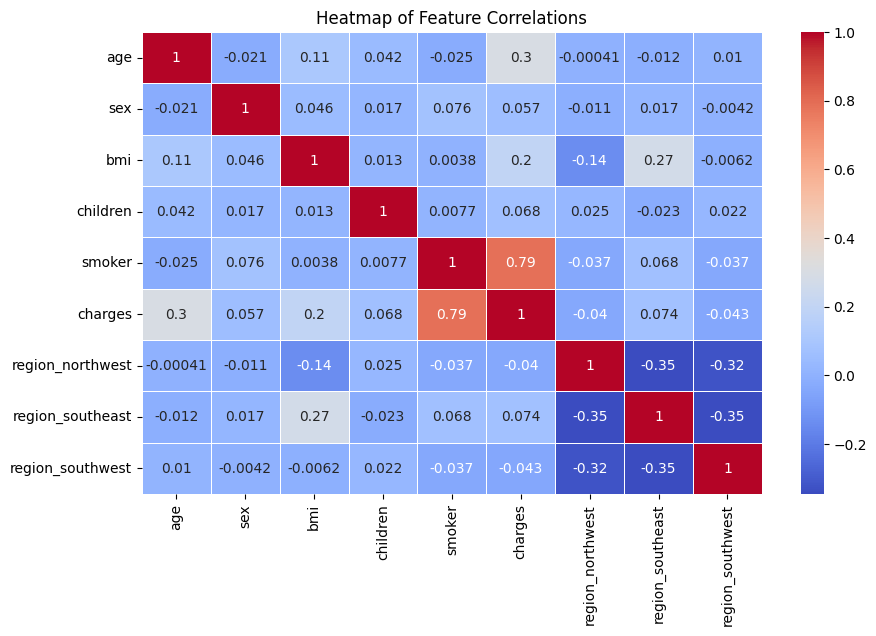

In [2]:
Plotting Heatmap to See Dependency of Dependent Value on Independent Features

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting heatmap to see dependencies
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()


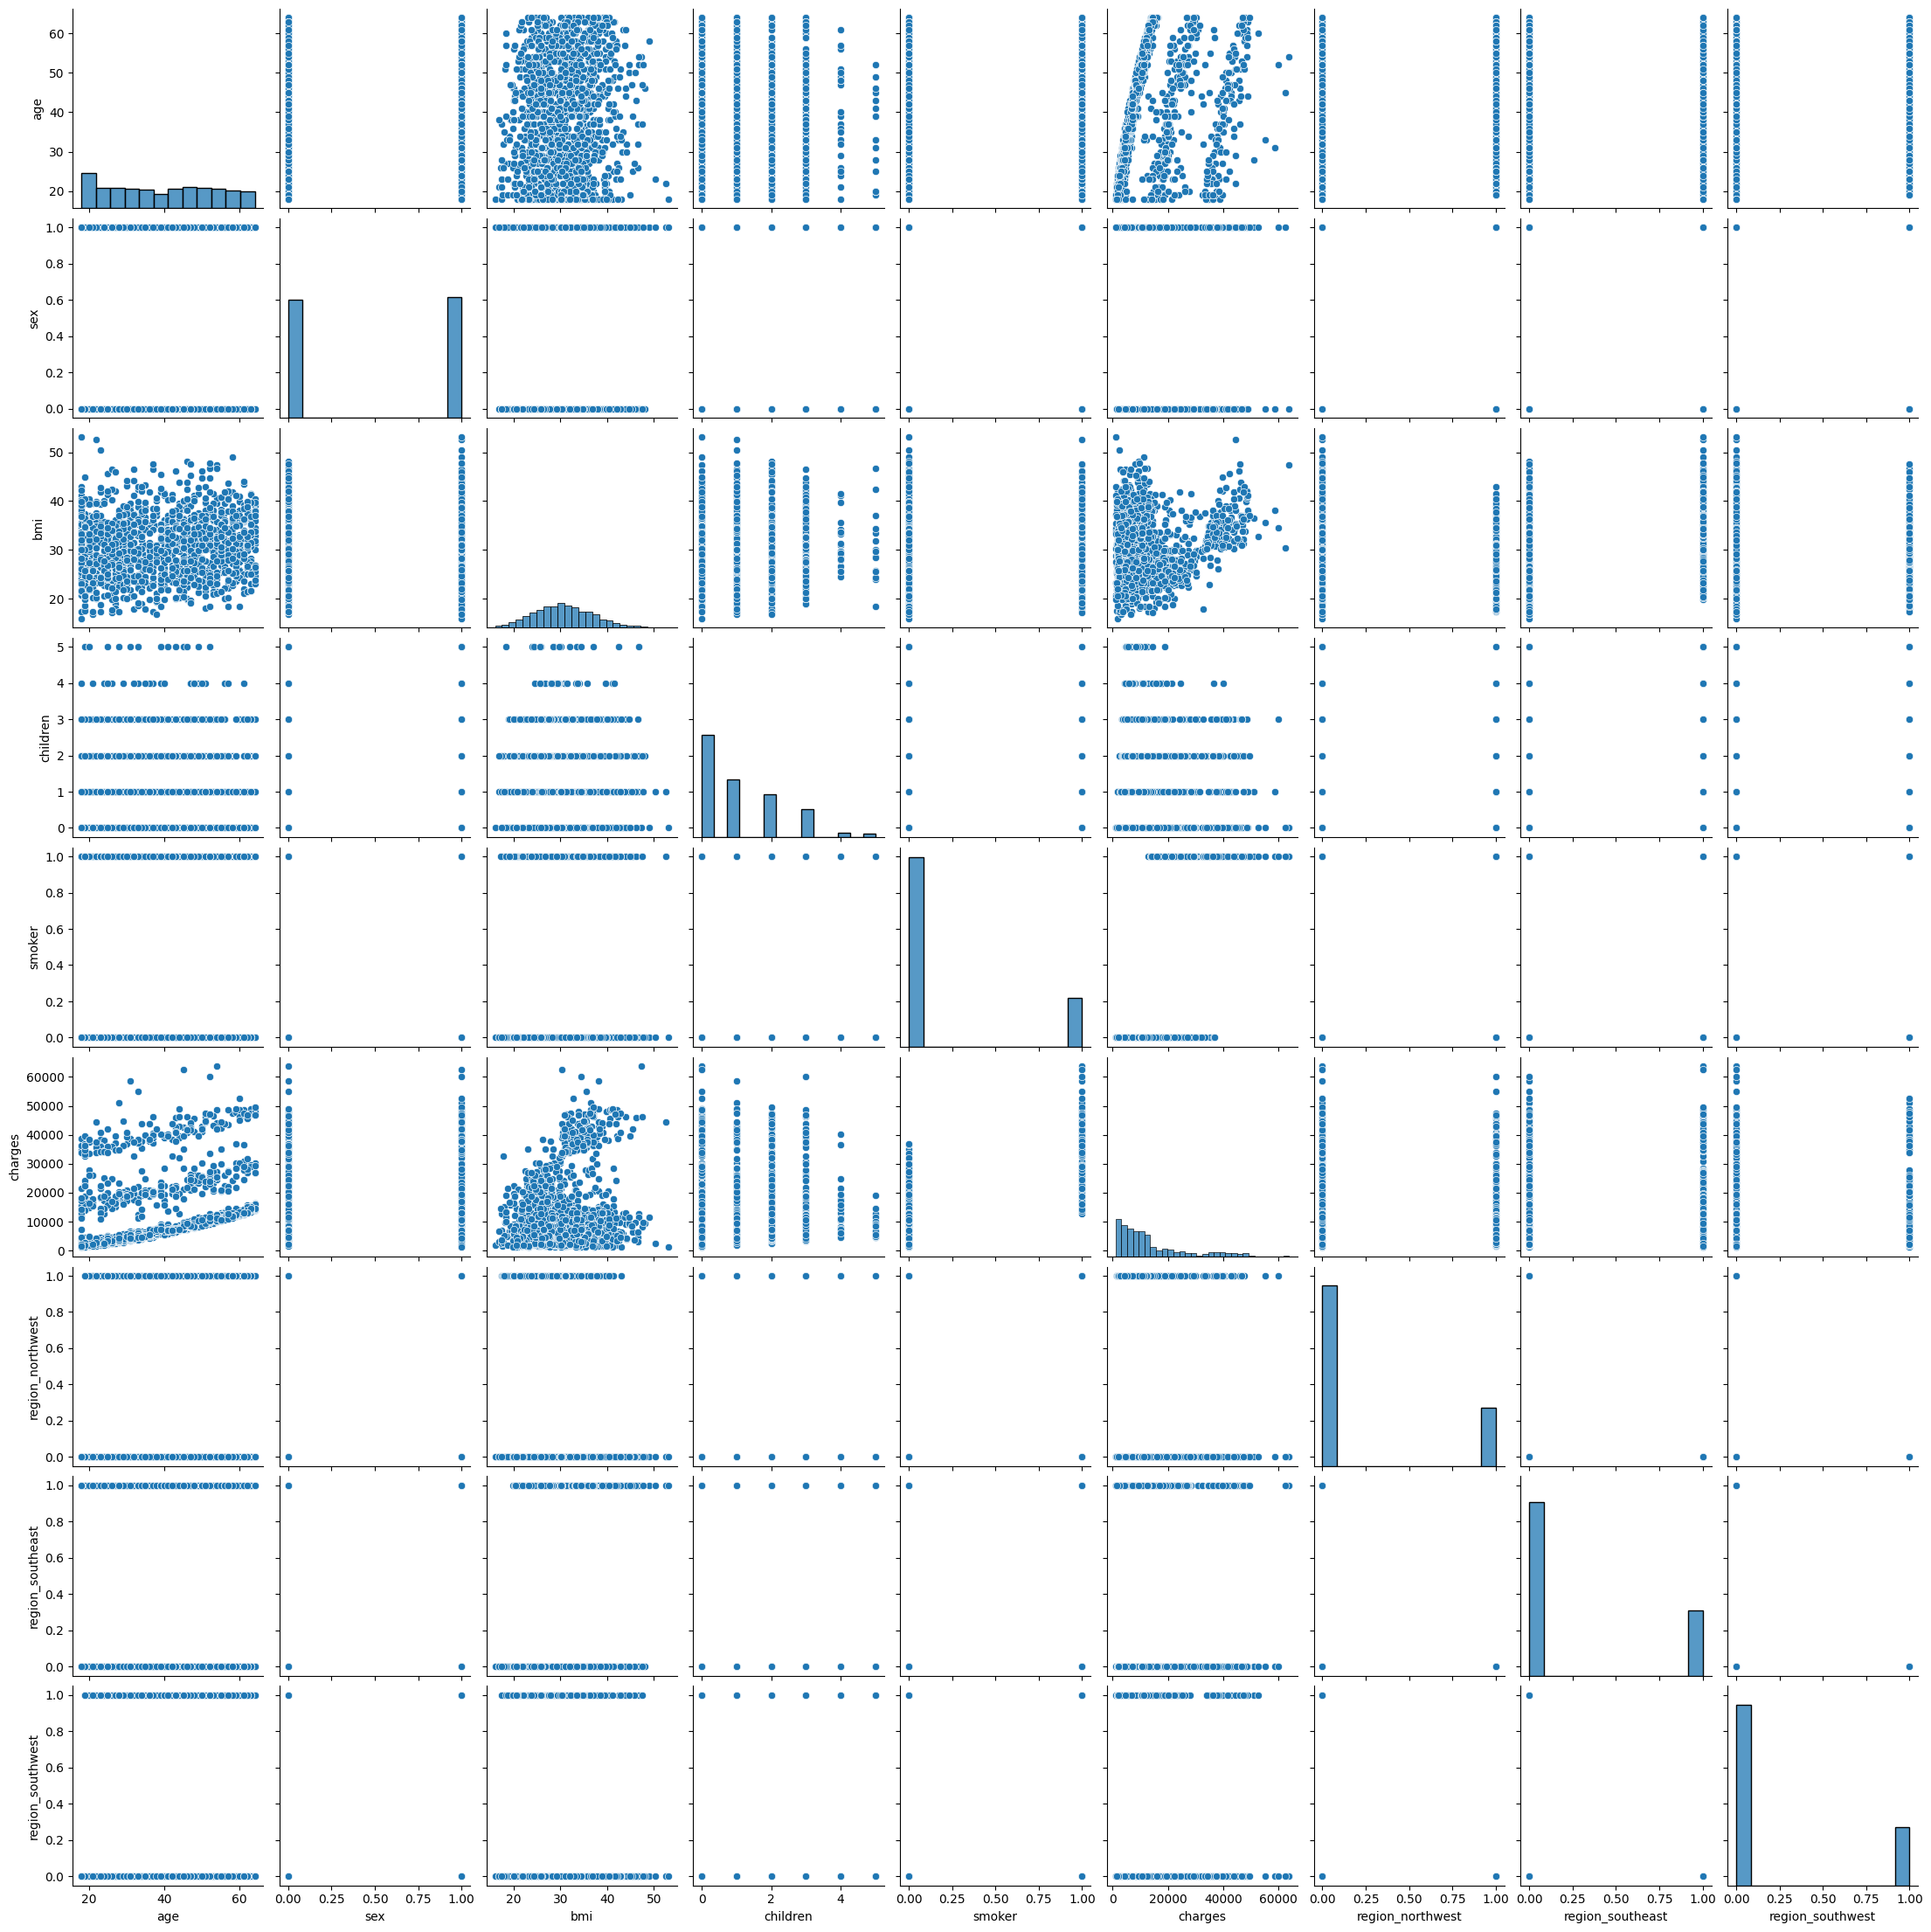

In [3]:
#Data Visualization (Plots of Feature vs Feature)

# Pair plot to visualize relationships
sns.pairplot(data)
plt.show()


age Skewness: 0.055610083072599126
age Kurtosis: -1.2449206804584227
bmi Skewness: 0.28372857291709386
bmi Kurtosis: -0.05502310583700032
children Skewness: 0.9373281163874423
children Kurtosis: 0.1972174268623732
charges Skewness: 1.5141797118745743
charges Kurtosis: 1.595821363956751


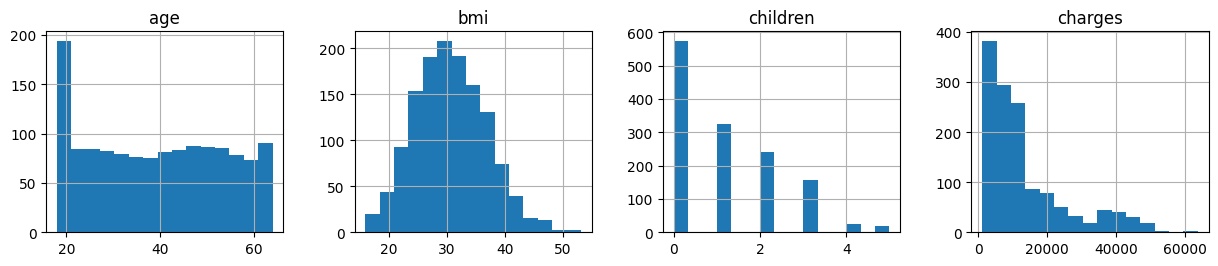

In [4]:
#Plotting Skew and Kurtosis

from scipy.stats import skew, kurtosis

# Calculating skewness and kurtosis
numerical_features = ['age', 'bmi', 'children', 'charges']
for feature in numerical_features:
    print(f'{feature} Skewness: {skew(data[feature])}')
    print(f'{feature} Kurtosis: {kurtosis(data[feature])}')

# Plotting histograms to visualize skewness
data[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()


In [5]:
 #Data Preparation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and testing sets
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
#Prediction Using Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Training the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluating the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R^2: {r2_lr}')


Linear Regression MSE: 33596915.851361476
Linear Regression R^2: 0.7835929767120722


In [7]:
#Prediction Using SVR

from sklearn.svm import SVR

# Training the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Making predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluating the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVR MSE: {mse_svr}')
print(f'SVR R^2: {r2_svr}')


SVR MSE: 166128803.80848217
SVR R^2: -0.07008155372454805


In [8]:
#Prediction Using Ridge Regressor

from sklearn.linear_model import Ridge

# Training the Ridge Regressor model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Making predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluating the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regressor MSE: {mse_ridge}')
print(f'Ridge Regressor R^2: {r2_ridge}')


Ridge Regressor MSE: 33604973.53996331
Ridge Regressor R^2: 0.7835410749121385


In [9]:
# Prediction Using Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Training the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regressor MSE: {mse_rf}')
print(f'Random Forest Regressor R^2: {r2_rf}')


Random Forest Regressor MSE: 20877104.681165546
Random Forest Regressor R^2: 0.8655247970108418


In [10]:
#Performing Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30]
}
grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

# Best parameters and score
best_params_rf = grid_rf.best_params_
best_score_rf = grid_rf.best_score_
print(f'Best Parameters for Random Forest: {best_params_rf}')
print(f'Best Score for Random Forest: {best_score_rf}')


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}
Best Score for Random Forest: 0.8371517882114095


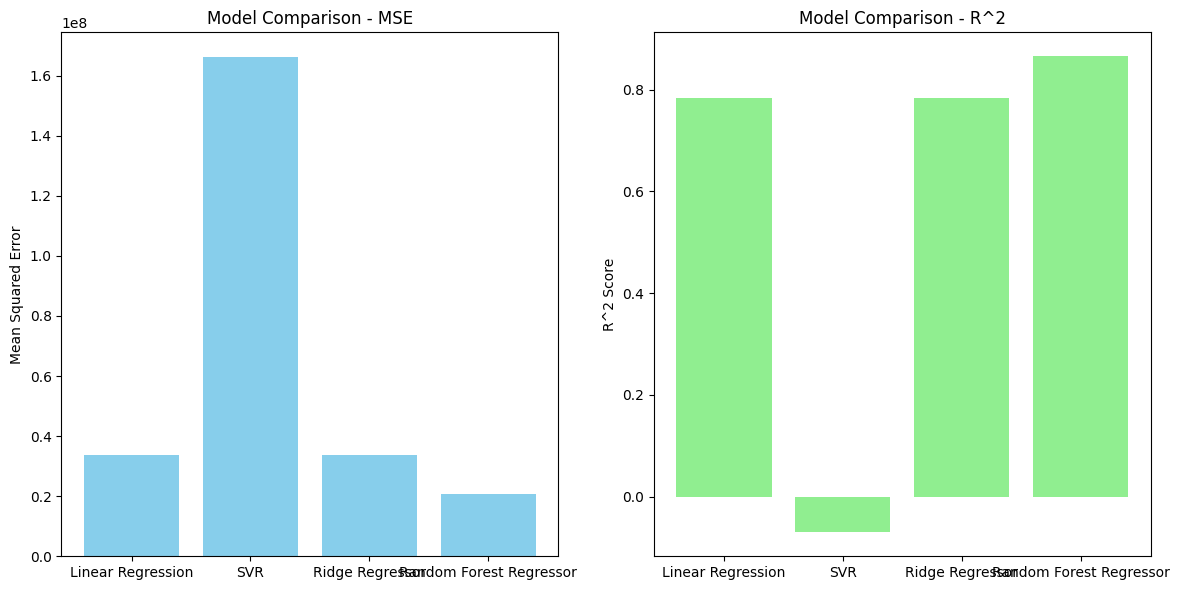

In [11]:
#Plotting Graph for All Models to Compare Performance

import matplotlib.pyplot as plt

# Comparing performance
models = ['Linear Regression', 'SVR', 'Ridge Regressor', 'Random Forest Regressor']
mse_scores = [mse_lr, mse_svr, mse_ridge, mse_rf]
r2_scores = [r2_lr, r2_svr, r2_ridge, r2_rf]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color='skyblue')
plt.title('Model Comparison - MSE')
plt.ylabel('Mean Squared Error')

# Plotting R-squared
plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color='lightgreen')
plt.title('Model Comparison - R^2')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()
